<a href="https://colab.research.google.com/github/sunbui/Breast-cancer-classification/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**<h2>Machine learning models to classify breast cancer subtypes using gene and 
microRNA data</h2>**




---
<h3>Motivation</h3>
<p align="justify">
The classification of different breast cancer subtypes is of great importance in diagnosis, treatment, and drug discovery. Each cancer subtypes usually have a specific gene and miRNA expression pattern. In this project, we aim to build different machine learning models to investigate the accuracy of breast cancer subtype classification using different classification algorithms. Furthermore, we aim to find key genes and microRNAs related to different breast cancer subtypes by analyzing these models. </p>
<h3>Introduction</h3>

<p align="justify"> Breast cancer is one of the major causes of death among women.  There are different types of breast cancer depending on the specific cells in the breast that are affected. The major breast cancer subtypes are Luminal A, Luminal B, Her2, basal, and normal-like.
In this project, we wanted to explore whether combining gene and microRNA expression improves breast cancer classification. To achieve this goal, we train different classification algorithms and measure their prediction accuracy.</p>
<h3>Biological background</h3>
<p align="justify"> A gene is a small region of the DNA sequence. Each gene has a specific and unique function. Genes can be classified into protein-coding genes, RNA-coding genes, and untranslated genes.
Protein coding genes produce proteins, and RNA-coding genes produce different types of non-coding RNA (microRNA, siRNA) within the cells.
Gene expression is the process that the information is encoded in our DAN converted to functional products like RNA, protein, etc.  Gene expression measurement aims to measure the number of RNA molecules that are produced from each gene. Currently, there are many advanced technologies like RNA-seq that simultaneously measure the expression of all genes in a biological sample, tissue, cell type, etc.
It is known that in many diseases like cancer the expression of certain genes changed compare to healthy people. </p>


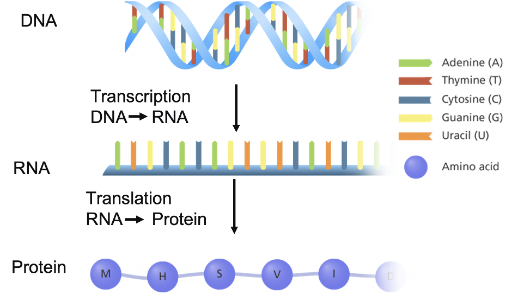

**Figure1:** Central dogma in biology. 

Central dogma explains the flow of genetic information, from DNA to RNA, to make a functional product, a protein.

<h3>Breast cancer subtype classification</h3>
<p align="justify"> The idea behind my approach is that different breast cancer subtypes affect the expression of different genes and microRNAs at different levels, so if we can learn this pattern using different classification algorithms from hundreds of breast cancer patients, then hopefully we can classify (predict) any new patient cancer subtype. This can help us to understand which genes and microRNA are involved in different breast cancer subtypes. Furthermore, the potential clinical application of this approach is to better diagnose patients, and give the right treatment for the right patient, etc.</p>




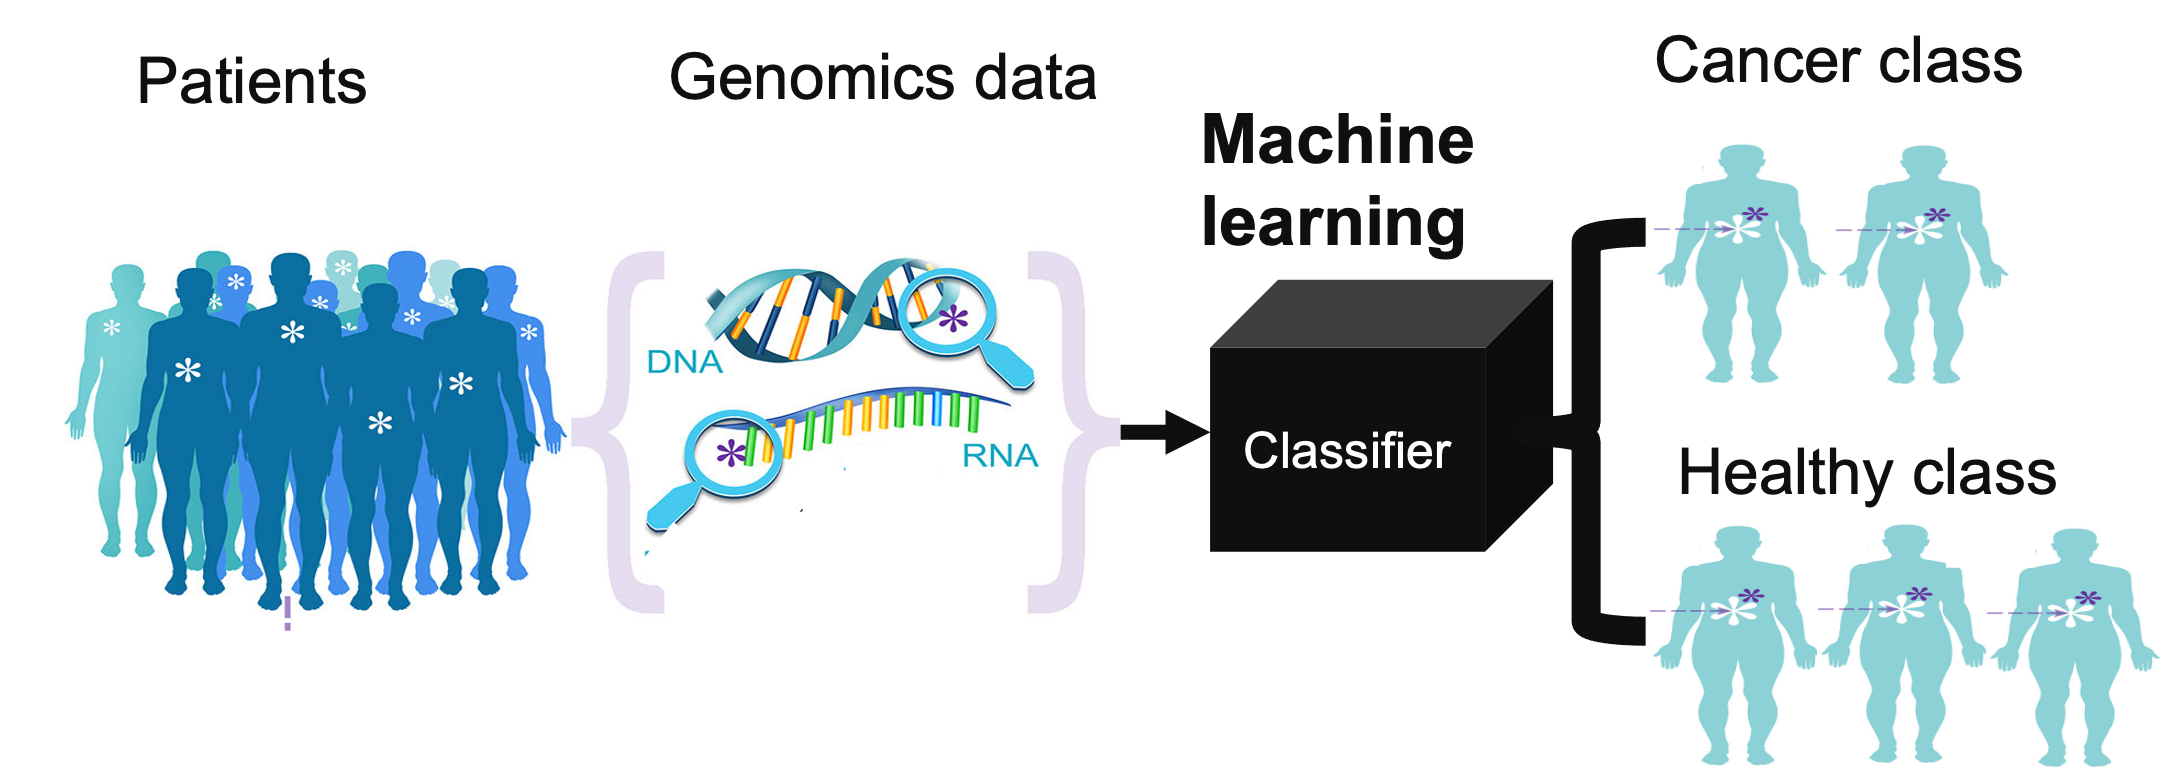



**Figure.2:** Overview of the project. We have gene and microRNA expression data which are measured in different breast cancer patients. The goal is that we apply different classification algorithms on this data to accuratly classify pateints into different claseses (healthy vs. cancer or subtype A vs. subtype B).  


<h3>Data processing</h3>
<p align="justify"> We downloaded gene and microRNA expression from the TCGA website. One of the critical steps during the preprocessing of the data before building a machine learning model is scaling the data. Scaling data can have a huge impact on the performance of the model. Scaling features is very important when we want to compute the distance between data points which is the common cause in the classification algorithms.  
 The most common approaches to scale data are standardization and normalization. 
Normalization is used when we want to bound feature values between two numbers, typically, between [0,1] or [-1,1]. Standardization scales the data to have zero mean and a standard division of 1. </p>

**Load the data from local computer to the colab**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
## Import the data:
## With this function, you can upload files (data) from your computer to the google colab
from google.colab import files
uploaded = files.upload()

Saving Gene_Expression_LumA_B.csv to Gene_Expression_LumA_B.csv


In [ ]:
import io
df3 = pd.read_csv(io.BytesIO(uploaded['Gene_Expression_LumA_B.csv']))


In [ ]:
df3.info

<bound method DataFrame.info of           Unnamed: 0  CREB3L1     RPS11  ...     GREM1      QPCT  Class
0    TCGA-A1-A0SD-01  1.43450  0.765000  ...  3.322583 -0.355500      0
1    TCGA-A1-A0SE-01  0.89075  0.716000  ...  2.904833 -3.164000      0
2    TCGA-A1-A0SH-01  2.25925  0.417125  ...  3.921333 -2.602875      0
3    TCGA-A1-A0SJ-01  0.43775  0.115000  ...  3.230000 -2.013500      0
4    TCGA-A1-A0SM-01  2.58000 -0.525000  ...  3.178500 -1.473125      1
..               ...      ...       ...  ...       ...       ...    ...
356  TCGA-E2-A1B1-01  1.89825  0.352250  ...  3.825667 -2.617625      0
357  TCGA-E2-A1B4-01  1.71825  0.326125  ...  2.837333 -4.179375      0
358  TCGA-E2-A1B6-01  1.40025  1.406625  ...  2.277455 -2.881500      0
359  TCGA-E2-A1BC-01  1.63025  0.649750  ...  2.739833 -3.379375      0
360  TCGA-E2-A1BD-01  0.46525  0.600750  ...  2.471000 -3.965750      0

[361 rows x 5783 columns]>

In [ ]:
df3 = df3.drop(df3.columns[[0]], axis=1)

In [ ]:
df3.describe()

,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,APBB2,KLHL13,PDCL3,DECR1,SALL1,CADM4,RPS18,HNRPD,CFHR5,SLC10A7,LMAN1,SUHW1,CHD8,SUMO1,GP1BA,DDB1,MYO9B,MMP7,CRNKL1,C9orf45,XAB2,RTN1,KLHL14,TBX10,CENPQ,UTY,ZBTB12,DTNBP1,KBTBD8,ZEB1,ZG16,...,TNS1,PLCD4,IQCD,SMPX,CD9,SRGN,CASP7,INOC1,VMAC,USP53,CAMK1G,TMEM106A,CDC20,ACSL5,CBWD5,C1orf87,KIAA1274,PRUNE2,LYPLA2,DOK6,GPR149,FAM30A,TMEM129,SLC35B3,ACPP,SLC4A7,CCDC40,GART,THOP1,SCARB1,CACNA1F,TRIAP1,SFRS8,PBOV1,GOLSYN,GJB7,CAMK2N1,GREM1,QPCT,Class
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.998298,0.414155,0.193598,0.439432,-1.956023,-0.159679,0.040341,-0.170198,0.388259,1.598661,-1.808209,0.392748,0.039560,-3.304658,0.767744,0.050522,-0.588513,0.530940,0.249625,-0.604953,-3.524489,0.004117,0.450236,0.525416,-0.078272,-0.184396,5.371384,0.755527,-1.214643,0.253897,1.773712,-1.061225,-0.943248,-1.431827,-1.157970,-0.001886,-0.045934,-1.317645,0.323537,-0.877213,...,0.129202,0.938213,1.029553,-2.280935,1.140422,0.906753,1.073185,0.144008,1.445561,0.601396,-0.433539,0.186028,-2.013900,-0.373449,-0.598903,-1.018658,0.537420,-1.863002,-0.195710,-1.328028,-0.232498,1.888971,0.376706,0.868986,0.074827,0.617091,2.292882,-1.383198,-1.205148,-0.822699,0.206206,-0.205977,-0.318238,0.177501,2.242762,-1.368517,0.765450,2.858483,-2.836273,0.357341
std,0.749404,0.485448,0.568276,0.977323,0.525191,0.447993,0.485011,1.098824,0.332392,0.639128,1.377469,0.391126,0.696111,0.907651,0.557963,0.512098,0.391030,0.568274,0.368899,0.595604,0.578741,0.414313,0.323682,0.841462,0.411040,0.331108,1.635473,0.485480,0.756027,0.427427,0.839410,0.624556,0.816608,0.565012,0.539958,0.490422,0.406320,0.764005,0.935462,1.382295,...,0.333751,1.238197,0.701316,0.988559,0.673326,0.908666,0.627190,0.286597,0.505441,0.628036,0.426998,0.570323,0.750429,0.997727,0.666525,0.788826,0.776979,0.800103,0.588597,0.902618,0.305160,1.408625,0.463027,0.627699,0.797711,1.011293,0.759201,0.402580,0.495139,0.502152,0.519397,0.333030,0.428524,0.302650,1.147065,1.292680,0.848050,0.992475,1.038564,0.479881
min,-1.412750,-0.708875,-1.714500,-2.284667,-5.026750,-1.538667,-1.381500,-2.807000,-1.200000,-0.199750,-4.868750,-0.755167,-3.287125,-6.548500,-1.151333,-1.699571,-1.913500,-1.236333,-1.047875,-2.456500,-5.293750,-1.089800,-0.425200,-1.042700,-1.514500,-1.335600,-1.591250,-0.587875,-2.974667,-1.171500,-0.211500,-3.169375,-2.705500,-3.057750,-3.151667,-2.979500,-1.116875,-3.625833,-2.832000,-2.869000,...,-0.817100,-3.190500,-0.927167,-4.513333,-1.698667,-1.242750,-1.237375,-0.979167,-0.625500,-1.874200,-1.998500,-1.384667,-3.916000,-3.135833,-2.356875,-2.937000,-1.864500,-3.798071,-2.444167,-4.180167,-1.592500,-0.852000,-1.254500,-1.463250,-1.772000,-2.238600,-0.169500,-2.475500,-2.519000,-2.288625,-0.852500,-1.123167,-1.342667,-1.057667,-1.517000,-3.960000,-1.972500,-0.258273,-5.497375,0.000000
25%,0.549750,0.103250,-0.150250,-0.240167,-2.274500,-0.437833,-0.274750,-0.817750,0.200500,1.203000,-2.838250,0.110000,-0.357000,-3.871333,0.414667,-0.316000,-0.824833,0.199000,0.013375,-1.004375,-3.866750,-0.268800,0.243100,-0.055500,-0.312167,-0.385200,4.768750,0.458375,-1.733500,-0.013250,1.186625,-1.44

**Look at the class lable distribution**

In [ ]:
print(df3.groupby("Class").size())

Class
0    232
1    129
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

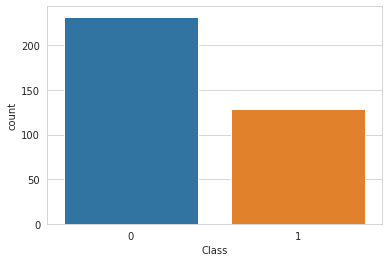

In [ ]:
sns.countplot(df3['Class'],label="Count")
plt.show

Looking at the data class lables distirubtion showes that we have 232 data from class 0 (breast cancer subtype Lum A) and 129 data from class 1 (beast cancer Lum B). This sounds good as the data distribution accross classes is not heavely unbalanced. 

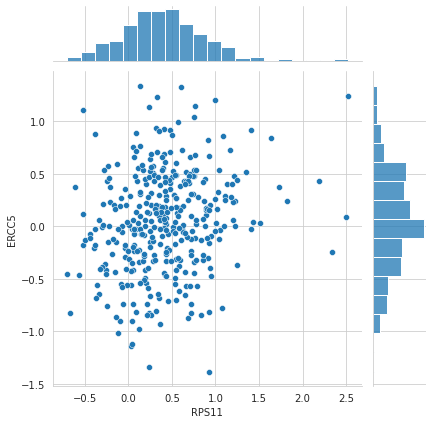

In [ ]:
sns.jointplot(x="RPS11",y="ERCC5",data=df3)

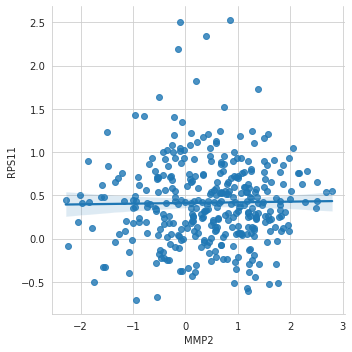

In [ ]:
sns.lmplot(x='MMP2',y='RPS11', data=df3)

In [ ]:
from sklearn.model_selection import train_test_split
y=df3['Class'] ## put class lable in in other variable called y

y

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df3.drop('Class',axis=1))
scaled_X=scaler.transform(df3.drop('Class',axis=1))
df3.head(5)

,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,APBB2,KLHL13,PDCL3,DECR1,SALL1,CADM4,RPS18,HNRPD,CFHR5,SLC10A7,LMAN1,SUHW1,CHD8,SUMO1,GP1BA,DDB1,MYO9B,MMP7,CRNKL1,C9orf45,XAB2,RTN1,KLHL14,TBX10,CENPQ,UTY,ZBTB12,DTNBP1,KBTBD8,ZEB1,ZG16,...,TNS1,PLCD4,IQCD,SMPX,CD9,SRGN,CASP7,INOC1,VMAC,USP53,CAMK1G,TMEM106A,CDC20,ACSL5,CBWD5,C1orf87,KIAA1274,PRUNE2,LYPLA2,DOK6,GPR149,FAM30A,TMEM129,SLC35B3,ACPP,SLC4A7,CCDC40,GART,THOP1,SCARB1,CACNA1F,TRIAP1,SFRS8,PBOV1,GOLSYN,GJB7,CAMK2N1,GREM1,QPCT,Class
0,1.43450,0.765000,0.52600,1.506000,-2.01825,0.043333,-0.10725,0.103125,-0.0620,1.85600,-0.85075,0.088500,-0.236000,-2.730000,0.481000,0.238357,-0.206417,0.364167,0.652875,-0.597375,-3.58150,-0.1353,0.6816,-0.1768,-0.887500,-0.5298,5.38025,1.811375,-0.583333,0.30400,1.733000,-0.637125,-1.0320,-1.13375,-1.362462,-0.5740,0.228750,-1.174500,1.124333,-1.22675,...,-0.3211,2.19800,1.197167,-2.80975,1.674333,0.321625,1.191125,0.009500,0.4555,-0.6034,-0.137250,0.093333,-2.8664,-1.811500,-0.367000,-1.208333,0.55525,-0.303571,-0.825500,0.102167,-0.57500,0.8145,0.60700,1.4160,-0.7340,-0.4949,3.24825,-1.763875,-1.08400,-1.805125,0.37750,-0.444833,-0.977500,0.15800,2.74850,-0.9895,1.175917,3.322583,-0.355500,0
1,0.89075,0.716000,0.13175,0.957833,-0.59025,-0.043667,-0.23850,-0.152250,0.4425,1.52475,0.46125,0.367500,0.144500,-3.038333,1.220667,0.575571,-0.426583,0.255667,0.350875,-0.573625,-4.13300,0.0108,0.5241,0.7352,-0.511000,-0.2624,6.55100,0.797125,-0.993833,0.01500,1.443000,-0.740500,-1.1665,-1.55600,-1.272929,0.3675,-0.386125,-2.397833,1.220667,-1.57525,...,0.3900,1.23625,0.655833,-2.67900,1.426167,0.393500,0.632500,0.313833,1.7770,0.7184,-0.634375,0.090667,-1.5682,-0.833167,-0.567125,-1.076333,0.90300,-2.291714,-0.103833,-1.285833,-0.08400,2.3935,0.53525,1.2195,-0.4155,0.5742,2.29125,-1.117250,-1.20400,-1.191625,0.48500,-1.020667,-0.656333,0.08000,2.35925,-1.9510,1.419667,2.904833,-3.164000,0
2,2.25925,0.417125,0.32500,2.285500,-1.72675,0.420500,0.00725,-0.696000,0.2960,2.12700,-0.00050,0.547667,0.230625,-0.958833,0.804333,-0.125214,-0.426833,0.487500,0.266250,-0.147500,-3.54900,-0.3685,0.4139,-0.1204,0.119167,-0.0064,6.38325,0.218000,-2.142667,0.06775,1.522125,-1.498250,-0.8470,-2.08250,-1.021143,-0.3680,-0.530250,-1.043500,1.530167,-1.94800,...,0.5468,-0.48800,-0.062833,-1.74325,1.607000,0.564250,0.870625,0.238500,1.8500,0.3275,-0.437250,2.032167,-2.6322,-1.372333,-0.488500,-1.047333,1.77150,-1.823643,-0.480333,0.136167,-0.43775,1.8150,0.57675,1.8580,-0.0555,-1.3689,2.64200,-1.366625,-1.28775,-1.229750,-0.42750,-0.211000,-0.834333,0.04875,2.38300,-1.2535,0.905333,3.921333,-2.602875,0
3,0.43775,0.115000,0.75775,-0.089333,-1.78375,0.251000,0.03525,-0.640625,0.6885,2.10675,-1.71250,0.852667,0.068625,-3.679333,0.159167,-0.316000,-0.351083,0.540000,0.314750,-0.234500,-3.71025,-0.6326,0.4085,0.7743,0.050667,-0.8960,6.39725,0.906875,-1.844167,-0.35500,0.912125,-0.927500,-1.0940,-1.48750,-0.939214,-0.4345,-0.393625,-1.300667,0.458000,2.51250,...,0.5338,-1.26050,0.597833,-1.63450,1.881333,1.438625,0.952875,-0.010000,1.2980,1.4826,-0.499625,-1.100000,-1.3646,-1.060667,-1.575750,-0.925000,0.71625,-1.605786,-0.493167,1.496667,-0.35100,2.9335,0.05350,0.8900,-0.0006,1.0538,1.46100,-1.508125,-1.64400,-0.353375,0.27675,-0.808500,-1.050667,0.03350,3.07225,-0.7390,1.089583,3.230000,-2.013500,0
4,2.58000,-0.525000,0.64175,1.591500,-1.86975,0.059833,-0.17725,0.091875,0.1710,0.86200,-1.83775,0.457167,-1.081750,-3.304000,1.149833,-0.745857,-0.477000,0.244667,0.560875,0.570500,-3.12050,0.1412,-0.0344,-0.0248,-0.394667,0.0642,5.71675,0.497625,-2.403000,-0.12000,1.091375,-1.208750,-0.9910,-1.49500,1.539214,-1.2445,-0.348875,-1.955833,0.528667,-1.59100,...,0.0641,-0.49650,1.752167,-1.47900,1.757333,0.984250,1.081500,0.400833,1.0910,0.6265,-0.347375,0.412833,-1.3915,-1.686500,-0.689750,-1.125667,2.01700,-1.341357,-0.039833,-0.774500,-0.36400,0.5985,0.03025,1.4490,-0.4581,-0.3488,2.88450,-1.332500,-1.53300,-0.813625,0.14525,-0.552833,-0.684500,-0.06050,2.05525,-1.75



#**Model building setup**

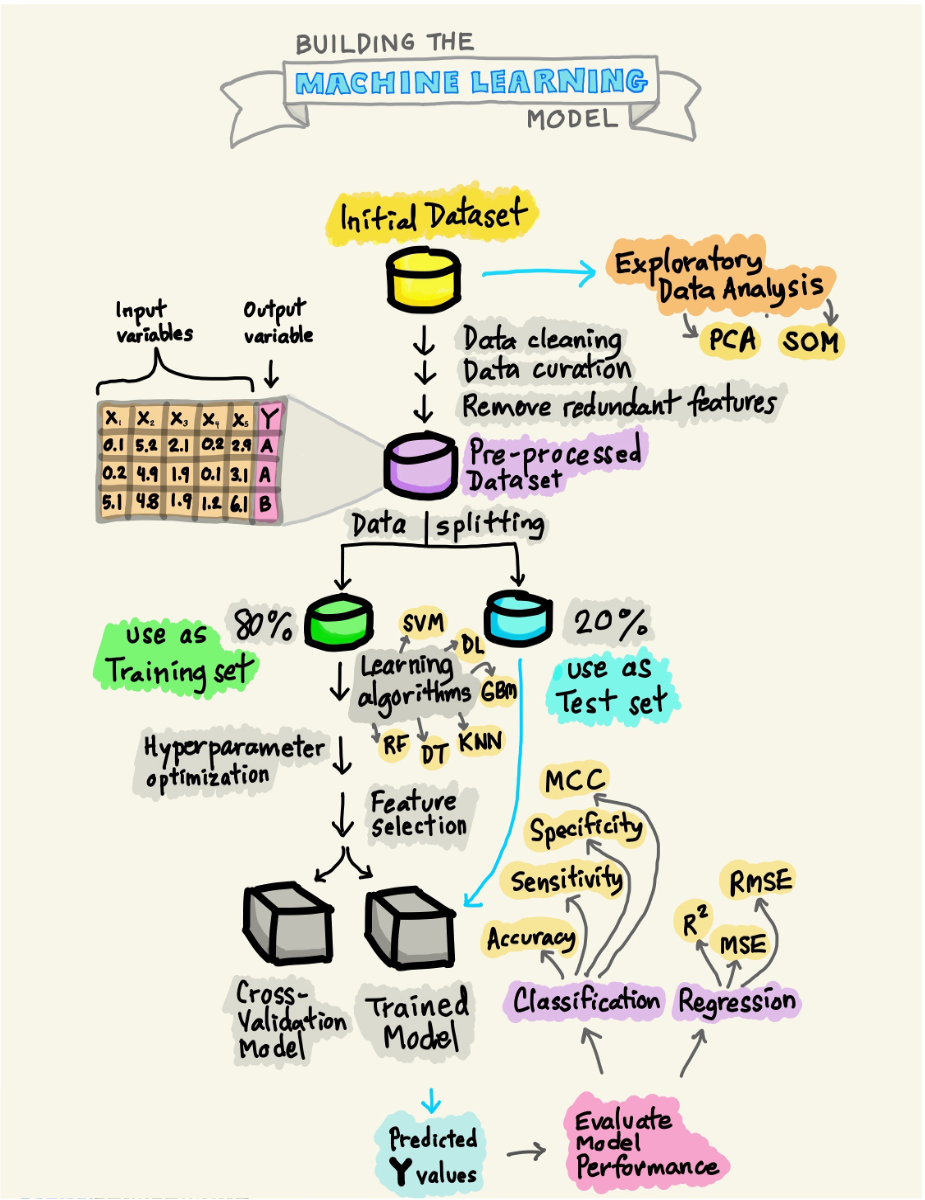

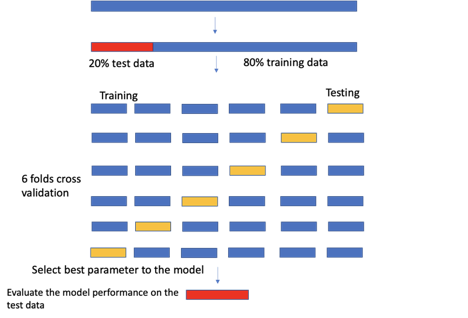

**Split data into test and train**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X, y, test_size=0.4,random_state=101)
print(X_train.shape)

(216, 5781)


#**Classification algorithms**


<p align="justify">In data science, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. In another word, classification is the categorization of data into different classes.  





Here we want to predict the breast cancer subtypes using combined gene and microRNA expression as input feature matrix, the output of the algorithm is the patient labels (breast cancer subtype). Every row of our input feature matrix is a patient and each column belongs to a gene which is measured across different samples.</p>


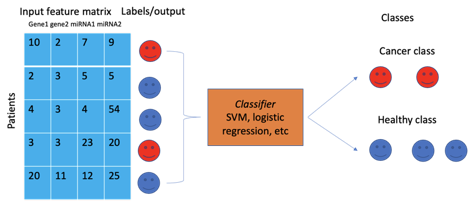

**Train logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Here we test the logistic regession model:

In [ ]:
# In the pervious step we did train the model, here we test it on the test data
predictions=logmodel.predict(X_test)

In [ ]:
## Here we try to see how well we do:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        91
           1       0.85      0.76      0.80        54

    accuracy                           0.86       145
   macro avg       0.86      0.84      0.85       145
weighted avg       0.86      0.86      0.86       145



# **K-nearest neighbors algorithm**

KNN is one of the supervised learning algorithm that can be used for classification. To classifiy any new data point, we look at it's K-nearst data point lables and classify this new data point based on it's k nearst data point lables. As example below, by choosing diffrent values for k, we get different prediction for the test data point. The question is that how do we the best value for the k to have accurate prediction? This is the called model selection, and in the next section we look at this. *italicized text*

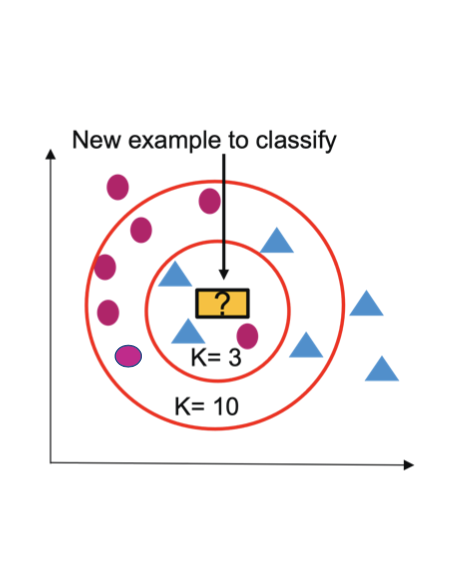

Figure3. Illustration of KNN algorithm. In this example, to classify the new data pont, we first select k=3, which means that we look at the lables of it's 3 nearst data point and classify it. In this case we predict the label of the new data point as blue triangel. In second case, we set the value of k=10, and we look at the 10 nearst data point for this test data point. In this case we predict the lable of the test data point as red circle.

# **Model selection for K-NN algorithm: How to choose the best value for K?**

One of the parameters that influce the prediction accuracy of K-NN algorithm is the value for k, in other word for any given data set, how many nearst neighbor do we need to look at to have accurate prediction accuracy? The best value for k is different from one data set to another one. So, for each learning task, we need to select the best value for k. This is called model selection for K-NN algorithm. The reason is that different values of K produces different model, and we need to choose a model that give us best prediction accuracy or lower prediction error. The way we can do model selection for K-NN is to traning K-NN model using different values for K (in this project we set K from 1-40), and look at the prediction error of each K. We choose the K that gives us the best prediction accuracy. 

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
## Train K-NN on different values of the K, and select the one that gives us lower prediction error.
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

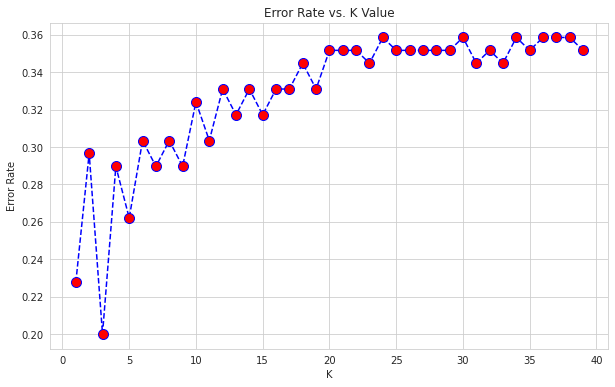

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Figure XX: Model selection for K-NN. This plot shows the prediction error vs. different values for the K. As it is clear from this plot, K=4 gives us the lowest prediction error.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=3


[[91  0]
 [29 25]]


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        91
           1       1.00      0.46      0.63        54

    accuracy                           0.80       145
   macro avg       0.88      0.73      0.75       145
weighted avg       0.85      0.80      0.78       145



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3) # setup KNN model for k = i
knn.fit(X_train,y_train) #t We fit the KNN model to our data with k=i    
pred_i = knn.predict(X_test) ## We make a prediction with our KNN model with k = i on our test data
print(pred_i)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0]


In [ ]:
print(confusion_matrix(y_test,pred_i))
print(classification_report(y_test,pred_i))

[[91  0]
 [29 25]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        91
           1       1.00      0.46      0.63        54

    accuracy                           0.80       145
   macro avg       0.88      0.73      0.75       145
weighted avg       0.85      0.80      0.78       145



#**Support vector machine (SVM)**

Supprot vector machine is goroup of classification algorithm to classify patients into different group. A Support Vector Machine (SVM) is a supervised machine learning algorithm that mostly used for both classification purposes.

In [ ]:
# support Vector machine
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[88  3]
 [18 36]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        91
           1       0.92      0.67      0.77        54

    accuracy                           0.86       145
   macro avg       0.88      0.82      0.83       145
weighted avg       0.86      0.86      0.85       145



**Model selection for SVM**

In [ ]:
# gridsearch practice
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.659, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.651, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.651, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.651, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.651, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.659, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.651, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.651, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.651, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   27.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[91  0]
 [54  0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        91
           1       0.00      0.00      0.00        54

    accuracy                           0.63       145
   macro avg       0.31      0.50      0.39       145
weighted avg       0.39      0.63      0.48       145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Decision tree**

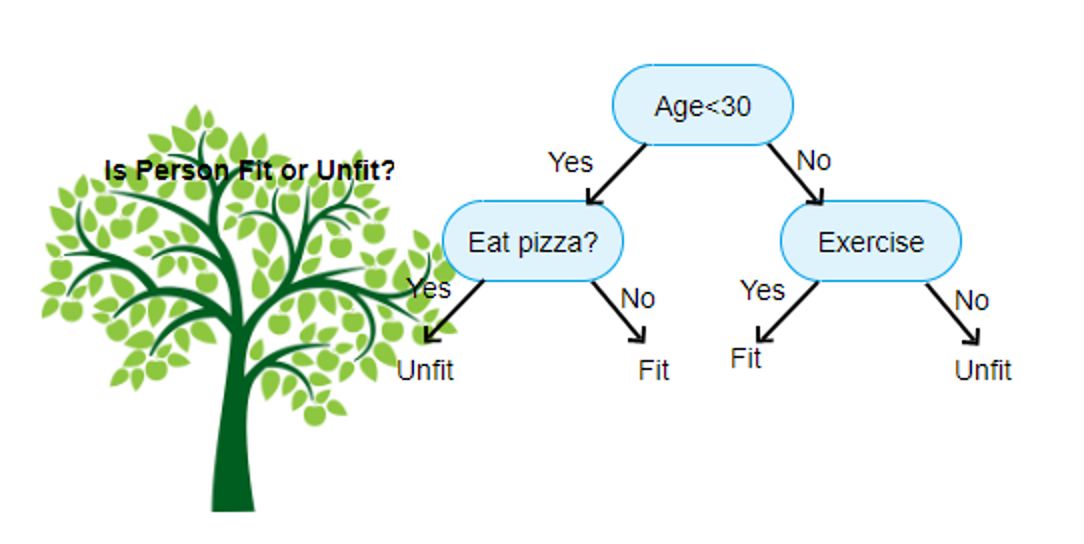

In [ ]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
# Predictions and Evaluation of Decision Tree
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        91
           1       0.64      0.70      0.67        54

    accuracy                           0.74       145
   macro avg       0.73      0.74      0.73       145
weighted avg       0.75      0.74      0.75       145

[[70 21]
 [16 38]]


#**Random forest**

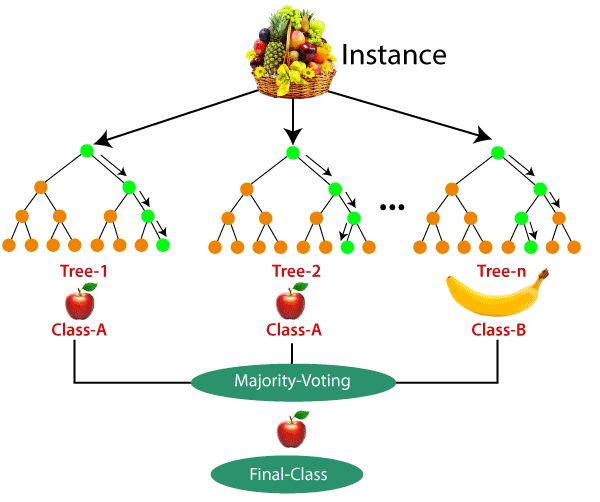

In [ ]:
#  Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[87  4]
 [12 42]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        91
           1       0.91      0.78      0.84        54

    accuracy                           0.89       145
   macro avg       0.90      0.87      0.88       145
weighted avg       0.89      0.89      0.89       145



<h3>Model training's result accuracy</h3>

*   Support vector machine : 0.31
*   Logistic regression : 0.86
*   Decision Tree: 0.73
*   K-nearest neighborhood : 0.88
*   Random forest : 0.90








**Figure3**


#**Discussion**